<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [659]:
#Importation de la librairie Pandas
import pandas as pd

In [660]:
import numpy as np

In [661]:
import matplotlib.pyplot as plt

In [662]:
import seaborn as sns

In [872]:
import openpyxl 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [663]:
#Importation du fichier population.csv
population_csv = pd.read_csv('/Users/helmisaddem/Downloads/DAN-P4-FAO/population.csv')


In [664]:
#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire_csv = pd.read_csv('/Users/helmisaddem/Downloads/DAN-P4-FAO/dispo_alimentaire.csv')

In [665]:
#Importation du fichier aide_alimentaire.csv
aide_alimentaire_csv = pd.read_csv('/Users/helmisaddem/Downloads/DAN-P4-FAO/aide_alimentaire.csv')


In [666]:
#Importation du fichier sous_nutrition.csv
sous_nutrition_csv = pd.read_csv('/Users/helmisaddem/Downloads/DAN-P4-FAO/ sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [667]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population_csv.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population_csv.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [ ]:
#Affichage les 5 premières lignes de la table
population_csv.head()

In [ ]:
dispo_alimentaire_csv.head()

In [ ]:
aide_alimentaire_csv.head()

In [ ]:
sous_nutrition_csv.head()

In [673]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population_csv['Valeur'] = population_csv['Valeur']*1000

In [674]:
#changement du nom de la colonne Valeur par Population
population_csv.rename(columns = {'Valeur':'Population'}, inplace = True)

In [ ]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population_csv.head()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [676]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire_csv.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire_csv.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [677]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire_csv.shape[1]))

Le tableau comporte 18 colonne(s)


In [ ]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire_csv.head()

In [679]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire_csv = dispo_alimentaire_csv.replace(np.nan,0)


In [680]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire_csv['Aliments pour animaux'] = dispo_alimentaire_csv['Aliments pour animaux'] * 1000000
dispo_alimentaire_csv['Autres Utilisations'] = dispo_alimentaire_csv['Autres Utilisations'] * 1000000
dispo_alimentaire_csv['Disponibilité intérieure'] = dispo_alimentaire_csv['Disponibilité intérieure'] * 1000000
dispo_alimentaire_csv['Exportations - Quantité'] = dispo_alimentaire_csv['Exportations - Quantité'] * 1000000
dispo_alimentaire_csv['Importations - Quantité'] = dispo_alimentaire_csv['Importations - Quantité'] * 1000000
dispo_alimentaire_csv['Nourriture'] = dispo_alimentaire_csv['Nourriture'] * 1000000
dispo_alimentaire_csv['Pertes'] = dispo_alimentaire_csv['Pertes'] * 1000000
dispo_alimentaire_csv['Production'] = dispo_alimentaire_csv['Production'] * 1000000
dispo_alimentaire_csv['Semences'] = dispo_alimentaire_csv['Semences'] * 1000000
dispo_alimentaire_csv['Traitement'] = dispo_alimentaire_csv['Traitement'] * 1000000
dispo_alimentaire_csv['Variation de stock'] = dispo_alimentaire_csv['Variation de stock'] * 1000000

In [681]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire_csv.head()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [682]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire_csv.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire_csv.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [683]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire_csv.shape[1]))

Le tableau comporte 4 colonne(s)


In [ ]:
#Affichage les 5 premières lignes de la table
aide_alimentaire_csv.head()

In [685]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire_csv.rename(columns = {'Pays bénéficiaire':'Zone'}, inplace = True)


In [686]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire_csv['Valeur'] = aide_alimentaire_csv['Valeur']*1000

In [ ]:
#Affichage les 5 premières lignes de la table
aide_alimentaire_csv.head()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [688]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition_csv.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition_csv.shape[1]))


Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [689]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(sous_nutrition_csv.shape[1]))

Le tableau comporte 3 colonne(s)


In [ ]:
#Afficher les 5 premières lignes de la table
sous_nutrition_csv.head()

In [691]:
#Conversion de la colonne sous nutrition en numérique: problèmes des valeurs <0,1 ==> remplacée par 0
sous_nutrition_csv['Valeur'] = sous_nutrition_csv['Valeur'].replace('<0.1','0')

In [692]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition_csv['Valeur'] = pd.to_numeric(sous_nutrition_csv['Valeur'], errors='coerce')

In [693]:
sous_nutrition_csv = sous_nutrition_csv.replace(np.nan,0)

In [694]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition_csv.rename(columns = {'Valeur':'sous_nutrition'}, inplace = True)

In [695]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition_csv['sous_nutrition'] = sous_nutrition_csv['sous_nutrition']*1000000

In [ ]:
#Afficher les 5 premières lignes de la table
sous_nutrition_csv.head()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [697]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
sous_nutrition_2017 = sous_nutrition_csv.loc[sous_nutrition_csv['Année'] == '2016-2018', ['Zone', 'Année','sous_nutrition']]

In [698]:
population_2017 = population_csv.loc[population_csv['Année'] == 2017, ['Zone', 'Année','Population']]

In [699]:
sous_alimentation = pd.merge(sous_nutrition_2017, population_2017, on = 'Zone', how = 'inner')

In [700]:
sous_alimentation = sous_alimentation.rename(columns={'Année_y':'Annee'})
sous_alimentation = sous_alimentation.drop(columns=['Année_x'])

In [701]:
#Affichage du dataset
sous_alimentation.head()

,Zone,sous_nutrition,Annee,Population
0,Afghanistan,10500000.0,2017,36296113.0
1,Afrique du Sud,3100000.0,2017,57009756.0
2,Albanie,100000.0,2017,2884169.0
3,Algérie,1300000.0,2017,41389189.0
4,Allemagne,0.0,2017,82658409.0


In [702]:
#Calcul et affichage du nombre de personnes en état de sous nutrition: on ne dispose pas de données pour tous les pays, on ne fera de calcul que sur les pays dont on a les chiffres
sous_alimentation['pourcentage_sous_nutrition'] = round(((sous_alimentation['sous_nutrition'].div (sous_alimentation['Population']))*100),2)
pays_documentes = sous_alimentation.loc[sous_alimentation['pourcentage_sous_nutrition'] != 0]
pourcentage_sous_nutrition_monde = round(((pays_documentes['sous_nutrition'].sum() / pays_documentes['Population'].sum())*100),2)

In [703]:
print('nombre de personnes en état de sous nutrition dans les pays dont on dispose des chiffres (84) est', pays_documentes['sous_nutrition'].sum())

nombre de personnes en état de sous nutrition dans les pays dont on dispose des chiffres (84) est 535700000.0


In [704]:
print ('le pourcentage de personnes dénutris en 2017 selon les données dont dispose est', pourcentage_sous_nutrition_monde,'%' )

le pourcentage de personnes dénutris en 2017 selon les données dont dispose est 12.85 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [705]:
#Combien mange en moyenne un être humain ? Source =>  2200 Kcal/jour 

In [706]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population : problème noms de 2 pays : royaume  uni et tchequie
population_2017['Zone'] = population_2017['Zone'].replace(["Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", "Tchéquie"], ["Royaume-Uni", "Tchéquie (la)"])
df_dispo = pd.merge(dispo_alimentaire_csv, population_2017, on = 'Zone', how = 'inner')
del df_dispo['Année']

In [ ]:
df_dispo.head()


In [708]:
disponibilite = df_dispo.drop(columns=["Origine",
                                       "Aliments pour animaux", 
                                       "Autres Utilisations", 
                                       "Disponibilité alimentaire en quantité (kg/personne/an)", 
                                       "Disponibilité de matière grasse en quantité (g/personne/jour)", 
                                       "Disponibilité de protéines en quantité (g/personne/jour)", 
                                       "Exportations - Quantité", "Importations - Quantité",
                                       "Nourriture", "Pertes", "Production", "Semences", "Traitement",
                                       "Variation de stock"])

In [ ]:
#Affichage du nouveau dataframe
disponibilite.head()

In [710]:
dispo_agg = disponibilite.groupby('Zone').agg({'Disponibilité alimentaire (Kcal/personne/jour)':'sum', 'Disponibilité intérieure':'sum'})

In [ ]:
dispo_agg.reset_index()

In [712]:
dispo_agg_pop = pd.merge(dispo_agg, population_2017, on = 'Zone', how = 'inner')

In [713]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_agg_pop['Kcal_dispo_pays'] = round((dispo_agg_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_agg_pop['Population']), 2)

In [ ]:
dispo_agg_pop.head()

In [715]:
Kcal_dispo_mondial = dispo_agg_pop['Kcal_dispo_pays'].sum()

In [716]:
print('nombre de calories disponibles mondialement',Kcal_dispo_mondial)

nombre de calories disponibles mondialement 21182162746926.0


In [717]:
#Calcul du nombre d'humains pouvant être nourris sur la base de 2200 Kcal/jour besoin jounalier moyen : 21182162746926.0/2200
nbre_humains_nourris = round((Kcal_dispo_mondial / 2200), 2)
print(nbre_humains_nourris,'pourraient être nourris en 2017 soit', round((nbre_humains_nourris / (dispo_agg_pop['Population'].sum()))*100, 2),'% de la population mondiale en 2017')

9628255794.06 pourraient être nourris en 2017 soit 130.65 % de la population mondiale en 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [718]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_vegetaux = df_dispo.loc[df_dispo['Origine'] == 'vegetale']


In [719]:
#Calcul du nombre de kcal disponible pour les végétaux
disponibilite_vegetaux = df_vegetaux.drop(columns=["Origine",
                                       "Aliments pour animaux", 
                                       "Autres Utilisations", 
                                       "Disponibilité alimentaire en quantité (kg/personne/an)", 
                                       "Disponibilité de matière grasse en quantité (g/personne/jour)", 
                                       "Disponibilité de protéines en quantité (g/personne/jour)", 
                                       "Exportations - Quantité", "Importations - Quantité",
                                       "Nourriture", "Pertes", "Production", "Semences", "Traitement",
                                       "Variation de stock"])


In [720]:
dispo_vegetaux_agg = disponibilite_vegetaux.groupby('Zone').agg({'Disponibilité alimentaire (Kcal/personne/jour)':'sum', 'Disponibilité intérieure':'sum'})

In [ ]:
dispo_vegetaux_agg.reset_index()

In [722]:
dispo_vegetaux_agg_pop = pd.merge(dispo_vegetaux_agg, population_2017, on = 'Zone', how = 'inner')
dispo_vegetaux_agg_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Année,Population
0,Afghanistan,1871.0,1.088400e+10,2017,36296113.0
1,Afrique du Sud,2533.0,5.343900e+10,2017,57009756.0
2,Albanie,2203.0,3.326000e+09,2017,2884169.0
3,Algérie,2915.0,3.551000e+10,2017,41389189.0
4,Allemagne,2461.0,1.268660e+11,2017,82658409.0


In [ ]:
dispo_vegetaux_agg_pop['Kcal_dispo_vegetaux_pays'] = round((dispo_vegetaux_agg_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_vegetaux_agg_pop['Population']), 2)
dispo_vegetaux_agg_pop.head()

In [724]:
Kcal_vegetaux_dispo_mondial = dispo_vegetaux_agg_pop['Kcal_dispo_vegetaux_pays'].sum()
print(Kcal_vegetaux_dispo_mondial)

17449509418936.0


In [725]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nbre_humains_nourris_vegetaux = round((Kcal_vegetaux_dispo_mondial / 2200), 2)
print(nbre_humains_nourris_vegetaux,"pourraient être nourris uniquement par les produits d'origine végétale en 2017 soit", 
      round((nbre_humains_nourris_vegetaux / (dispo_vegetaux_agg_pop['Population'].sum()))*100, 2),'% de la population mondiale en 2017')

7931595190.43 pourraient être nourris uniquement par les produits d'origine végétale en 2017 soit 107.63 % de la population mondiale en 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [726]:
#Calcul de la disponibilité totale
dispo_totale_mondiale = round((dispo_agg_pop['Disponibilité intérieure'].sum()),2)
print('La disponibilité intérieure mondiale totale pour 2017', dispo_totale_mondiale) 

La disponibilité intérieure mondiale totale pour 2017 9848994000000.0


In [727]:
distribution_dispo_int = df_dispo.drop(columns=["Origine",
                                               "Disponibilité alimentaire (Kcal/personne/jour)",
                                               "Disponibilité alimentaire en quantité (kg/personne/an)", 
                                               "Disponibilité de matière grasse en quantité (g/personne/jour)", 
                                               "Disponibilité de protéines en quantité (g/personne/jour)", 
                                               "Production",
                                               "Exportations - Quantité", "Importations - Quantité",
                                               "Population",
                                               "Variation de stock"])

In [ ]:
distribution_dispo_int.head()

In [729]:
distribution_dispo_int_agg = distribution_dispo_int.groupby('Zone').agg({'Aliments pour animaux': 'sum', 
                                                                         'Autres Utilisations': 'sum', 
                                                                         'Nourriture':'sum', 
                                                                         'Pertes': 'sum', 
                                                                         'Semences': 'sum', 
                                                                         'Traitement': 'sum',
                                                                         'Disponibilité intérieure': 'sum'})


In [ ]:
distribution_dispo_int_agg.reset_index()

In [732]:
distribution_dispo_int_agg['prop_animaux'] = round(((distribution_dispo_int_agg['Aliments pour animaux']/distribution_dispo_int_agg['Disponibilité intérieure'])*100),2)
distribution_dispo_int_agg['prop_utilisations'] = round(((distribution_dispo_int_agg['Autres Utilisations']/distribution_dispo_int_agg['Disponibilité intérieure'])*100),2)
distribution_dispo_int_agg['prop_nourriture'] = round(((distribution_dispo_int_agg['Nourriture']/distribution_dispo_int_agg['Disponibilité intérieure'])*100),2)
distribution_dispo_int_agg['prop_pertes'] = round(((distribution_dispo_int_agg['Pertes']/distribution_dispo_int_agg['Disponibilité intérieure'])*100),2)
distribution_dispo_int_agg['prop_semences'] = round(((distribution_dispo_int_agg['Semences']/distribution_dispo_int_agg['Disponibilité intérieure'])*100),2)
distribution_dispo_int_agg['prop_traitement'] = round(((distribution_dispo_int_agg['Traitement']/distribution_dispo_int_agg['Disponibilité intérieure'])*100),2)

In [ ]:
distribution_dispo_int_agg.head()

In [856]:
distribution_dispo_int_agg = distribution_dispo_int_agg.reset_index()

In [ ]:
distribution_dispo_int_agg.head()

In [735]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
for column in distribution_dispo_int_agg.columns[0:6]:
    print (column, round(((distribution_dispo_int_agg[column].sum()/dispo_totale_mondiale)*100),2),'%')
    


Aliments pour animaux 13.24 %
Autres Utilisations 8.78 %
Nourriture 49.51 %
Pertes 4.61 %
Semences 1.57 %
Traitement 22.38 %


In [736]:
value =[]
for column in distribution_dispo_int_agg.columns[0:6]:
    value.append(round(((distribution_dispo_int_agg[column].sum()/dispo_totale_mondiale)*100),2))
    

In [737]:
data = pd.DataFrame({'Utilisation':['Aliments pour animaux', 
                                    'Autres Utilisations', 'Nourriture', 
                                    'Pertes', 'Semences', 'Traitement'],
                    'Valeur':[1, 2, 3, 4, 5, 6]})

In [738]:
data['Valeur'] = value

In [826]:
data.head(10)

,Utilisation,Valeur
0,Aliments pour animaux,13.24
1,Autres Utilisations,8.78
2,Nourriture,49.51
3,Pertes,4.61
4,Semences,1.57
5,Traitement,22.38


Text(0.5, 1.0, 'Répartition de la disponibilité intérieure en 2017')

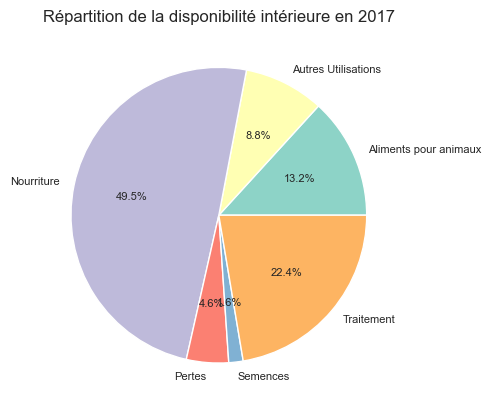

In [832]:
sns.set_style("darkgrid")
sns.set_palette("muted")
custom_palette = sns.color_palette("Set3", 9)
plt.pie(x = data['Valeur'], labels = data['Utilisation'], colors=custom_palette, autopct='%.1f%%', textprops={'fontsize': 8})
plt.Figure(figsize=(4,4))
plt.title("Répartition de la disponibilité intérieure en 2017", loc = 'center')


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [741]:
#Création d'une liste avec toutes les variables
cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"]

In [742]:
dispo_cereales = dispo_alimentaire_csv[dispo_alimentaire_csv['Produit'].isin(cereales)]

In [743]:
dispo_cereales["Disponibilité intérieure"].sum()

2406999000000.0

In [744]:
dispo_cereales = dispo_cereales.drop(columns=["Nourriture",
                             "Pertes", 
                             "Production",
                             "Semences",
                             "Traitement",
                             "Exportations - Quantité", "Importations - Quantité",
                             "Variation de stock"])

In [745]:
dispo_cereales_pays = pd.merge(dispo_cereales, population_2017, on = 'Zone', how = 'inner')

In [746]:
dispo_cereales_pays['cereal_pays'] = dispo_cereales_pays['Disponibilité alimentaire en quantité (kg/personne/an)'] * dispo_cereales_pays['Population']

In [ ]:
dispo_cereales_pays.head(40)

In [748]:
#Affichage de la proportion d'alimentation animale : 
prop_animaux_cereales = round(((dispo_cereales_pays['Aliments pour animaux'].sum()/dispo_cereales_pays['Disponibilité intérieure'].sum())*100),2)
print("Part de l'alimentation animale du total des céréales documentées", prop_animaux_cereales,'%')
part_humaine_cereales = round(((dispo_cereales_pays['cereal_pays'].sum()/dispo_cereales_pays['Disponibilité intérieure'].sum())*100),2)
print("Part de l'alimentation humaine du total des céréales documentées", part_humaine_cereales,'%')



Part de l'alimentation animale du total des céréales documentées 36.29 %
Part de l'alimentation humaine du total des céréales documentées 45.1 %


In [749]:
cereales_utilisations = dispo_cereales_pays.groupby('Produit').agg({'Aliments pour animaux': 'sum',
                                                                    'Disponibilité alimentaire (Kcal/personne/jour)': 'sum',
                                                                    'Disponibilité alimentaire en quantité (kg/personne/an)': 'sum',
                                                                    'Disponibilité de matière grasse en quantité (g/personne/jour)':'sum',
                                                                    'Disponibilité de protéines en quantité (g/personne/jour)':'sum',
                                                                    'Disponibilité intérieure':'sum',
                                                                    'cereal_pays':'sum'})

In [835]:
cereales_utilisations = cereales_utilisations.reset_index()

In [ ]:
cereales_utilisations.head(30)

In [752]:
cereales_utilisations['prop_animaux %'] = round(((cereales_utilisations['Aliments pour animaux']/cereales_utilisations['Disponibilité intérieure'])*100),2)
cereales_utilisations['prop_humaine %'] = round(((cereales_utilisations['cereal_pays']/cereales_utilisations['Disponibilité intérieure'])*100),2)

Text(0.5, 1.0, 'Répartition de la disponibilité en céréales en 2017')

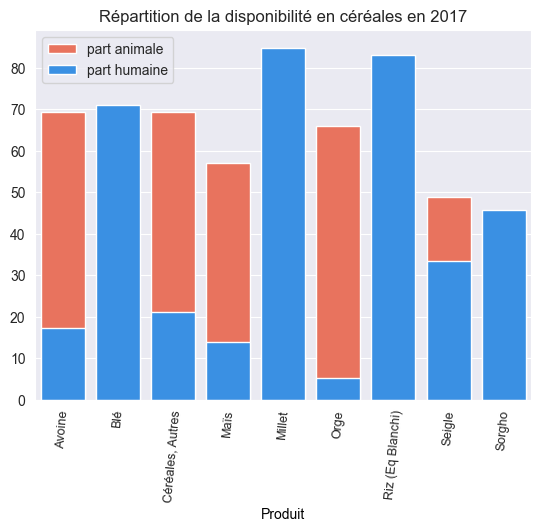

In [877]:
sns.barplot(data=cereales_utilisations, x=cereales_utilisations['Produit'], y=cereales_utilisations['prop_animaux %'], color='tomato', label='part animale')
sns.barplot(data=cereales_utilisations, x=cereales_utilisations['Produit'], y=cereales_utilisations['prop_humaine %'], color='dodgerblue', label = 'part humaine')
plt.ylabel("")
plt.xlabel("")
plt.xlabel('Produit', fontsize=10, color='black')
plt.xticks(rotation = 85, fontsize=9)
plt.legend(loc='best')
plt.title("Répartition de la disponibilité en céréales en 2017", loc='center')


In [ ]:
#Analyse supplémentaire : production céréalière mondiale:

etude_cereales = dispo_alimentaire_csv[dispo_alimentaire_csv['Produit'].isin(cereales)]
etude_cereales = etude_cereales.drop(columns=["Nourriture","Aliments pour animaux","Origine", "Autres Utilisations",
                                              "Pertes", "Disponibilité alimentaire (Kcal/personne/jour)",
                                              "Semences","Disponibilité alimentaire en quantité (kg/personne/an)",
                                              "Traitement", "Disponibilité de matière grasse en quantité (g/personne/jour)",
                                              "Exportations - Quantité", "Importations - Quantité",
                                              "Disponibilité de protéines en quantité (g/personne/jour)",
                                              "Variation de stock", "Disponibilité intérieure"])
etude_cereales.head(50)

                                                                    
                                                                    

In [912]:
product_cerealiere = dispo_alimentaire_csv[dispo_alimentaire_csv['Produit'].isin(cereales)].drop(columns=["Nourriture","Aliments pour animaux","Origine", "Autres Utilisations",
                                              "Pertes", "Disponibilité alimentaire (Kcal/personne/jour)",
                                              "Semences","Disponibilité alimentaire en quantité (kg/personne/an)",
                                              "Traitement", "Disponibilité de matière grasse en quantité (g/personne/jour)",
                                              "Exportations - Quantité", "Importations - Quantité",
                                              "Disponibilité de protéines en quantité (g/personne/jour)",
                                              "Variation de stock", "Disponibilité intérieure"])


In [918]:
product_cerealiere = product_cerealiere.pivot_table(index='Zone', values='Production', aggfunc='sum').reset_index().sort_values('Production', ascending=False).reset_index()

In [ ]:
product_cerealiere.head(50)

In [920]:
print(round(((product_cerealiere.iloc[0, 2]/(product_cerealiere['Production'].sum()))*100),2))

19.22


In [893]:
etude_cereales = etude_cereales.pivot_table(index='Zone', columns='Produit', values='Production', aggfunc='sum')


In [ ]:
etude_cereales = etude_cereales.reset_index()

In [ ]:
etude_cereales.head()


In [902]:
product_ble = etude_cereales.loc[:, ['Zone', 'Blé']].sort_values('Blé', ascending=False).reset_index()

In [ ]:
product_ble.head(10)

In [907]:
print(round(((product_ble.iloc[0, 2]/(product_ble['Blé'].sum()))*100),2))

17.21


In [921]:
print("La chine, continentale est le premier producteur céréalier :",round(((product_cerealiere.iloc[0, 2]/(product_cerealiere['Production'].sum()))*100),2), "% de la production céréalière dans le monde et le premier producteur du blé en 2017 :",round(((product_ble.iloc[0, 2]/(product_ble['Blé'].sum()))*100),2),"% de la production mondiale du blé")

La chine, continentale est le premier producteur céréalier : 19.22 % de la production céréalière dans le monde et le premier producteur du blé en 2017 : 17.21 % de la production mondiale du blé


In [922]:
top_10_product_cerealiere = product_cerealiere.head(10)

/var/folders/r_/fd0gwkxn6n995_hk_5lc9f540000gn/T/ipykernel_95323/1411112225.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_product_cerealiere, x = top_10_product_cerealiere['Zone'], y = top_10_product_cerealiere['Production'], palette="Greens_r")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Chine, continentale'),
  Text(1, 0, "États-Unis d'Amérique"),
  Text(2, 0, 'Inde'),
  Text(3, 0, 'Brésil'),
  Text(4, 0, 'Fédération de Russie'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Indonésie'),
  Text(8, 0, 'Ukraine'),
  Text(9, 0, 'Argentine')])

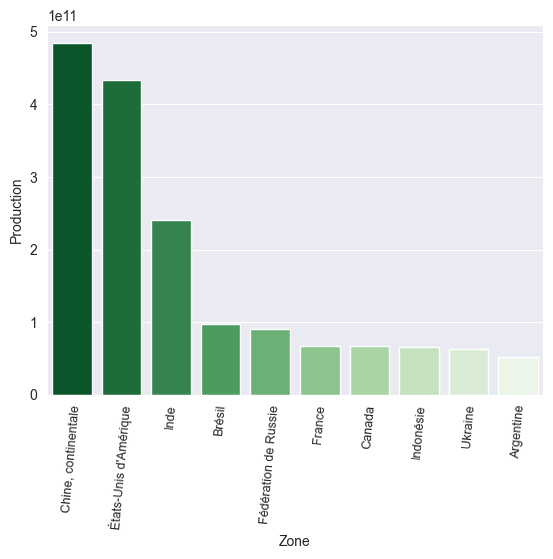

In [929]:
sns.barplot(data=top_10_product_cerealiere, x = top_10_product_cerealiere['Zone'], y = top_10_product_cerealiere['Production'], palette="Greens_r")
plt.xticks(rotation=85, fontsize=9)


In [ ]:
etude_cereales_exportation = dispo_alimentaire_csv[dispo_alimentaire_csv['Produit'].isin(cereales)]
etude_cereales_exportation = etude_cereales_exportation.drop(columns=["Nourriture","Aliments pour animaux","Origine", "Autres Utilisations",
                                              "Pertes", "Disponibilité alimentaire (Kcal/personne/jour)",
                                              "Semences","Disponibilité alimentaire en quantité (kg/personne/an)",
                                              "Traitement", "Disponibilité de matière grasse en quantité (g/personne/jour)",
                                              "Production", "Importations - Quantité",
                                              "Disponibilité de protéines en quantité (g/personne/jour)",
                                              "Variation de stock", "Disponibilité intérieure"])
etude_cereales_exportation.head(50)

In [934]:
plus_grand_export = etude_cereales_exportation.pivot_table(index='Zone', values='Exportations - Quantité', aggfunc='sum').sort_values('Exportations - Quantité', ascending=False).reset_index()

In [936]:
plus_grand_export = plus_grand_export.head(5)

/var/folders/r_/fd0gwkxn6n995_hk_5lc9f540000gn/T/ipykernel_95323/1146881413.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plus_grand_export, x='Zone', y='Exportations - Quantité', palette='Purples_r')


<Axes: xlabel='Zone', ylabel='Exportations - Quantité'>

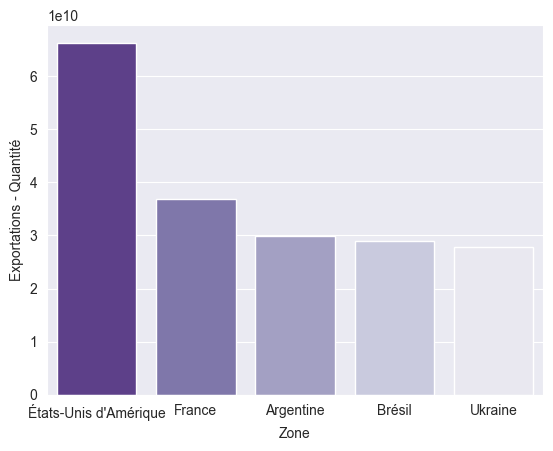

In [956]:
sns.barplot(data=plus_grand_export, x='Zone', y='Exportations - Quantité', palette='Purples_r')


In [939]:
plus_grand_export_ble = etude_cereales_exportation.loc[etude_cereales_exportation['Produit']=='Blé', :].sort_values('Exportations - Quantité', ascending=False).reset_index()

In [ ]:
plus_grand_export_ble = plus_grand_export_ble.head(10)
plus_grand_export_ble.head(10)

In [ ]:
chine_info = dispo_alimentaire_csv[dispo_alimentaire_csv['Produit'].isin(cereales)]
chine = chine_info.loc[chine_info['Zone'] == "Chine, continentale", ['Produit', 'Production', 'Nourriture', 'Exportations - Quantité', 'Importations - Quantité']].reset_index()
chine.head(20)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [ ]:
#affichage après trie des 10 pires pays
pays_documentes= pays_documentes.sort_values('pourcentage_sous_nutrition', ascending=False)
pays_denutris = pays_documentes.head(10)


In [967]:
pays_denutris = pays_denutris.sort_values('pourcentage_sous_nutrition', ascending=False).reset_index()

In [ ]:
sequential_colors = sns.color_palette("crest", 10)
pays_denutris.iloc[1,1] = "RPD de Corée"

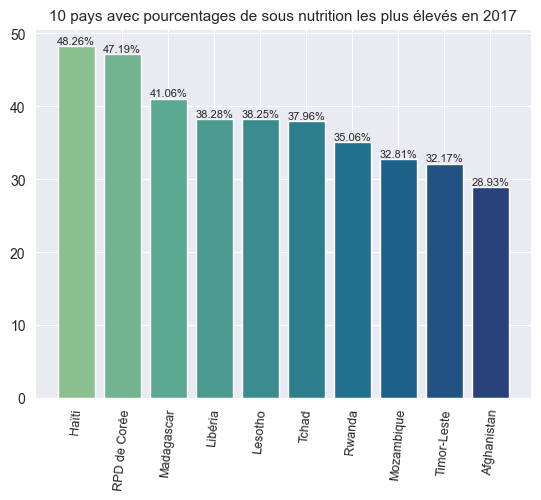

In [1060]:
graph = plt.bar(pays_denutris.Zone, pays_denutris.pourcentage_sous_nutrition, color=sequential_colors)
plt.xticks(rotation = 85, fontsize=9)
plt.title("10 pays avec pourcentages de sous nutrition les plus élevés en 2017", loc = 'center', fontsize = 11)
for rect in graph:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=8)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [ ]:
#calcul du total de l'aide alimentaire par pays (entre 2013 et 2016):
aide_alimentaire_csv.head(50)

In [760]:
#affichage après tri des 10 pays qui ont bénéficié le plus de l'aide alimentaire
top_10_aide = aide_alimentaire_csv.groupby('Zone').agg({'Valeur':'sum'}).sort_values(by='Valeur', ascending=False)


In [763]:
top_10 = top_10_aide.head(10)

In [765]:
top_10 = top_10.reset_index()

In [1035]:
top_10.head(10)

,Zone,Valeur
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


In [1074]:
top_10.iloc[8,0]

République démocratique du Congo


Text(0.5, 1.0, "10 pays qui ont plus bénéficié de l'aide alimentaire entre 2013 et 2016")

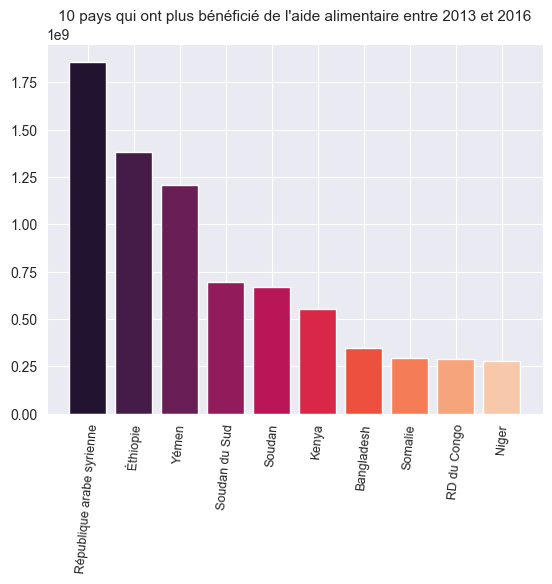

In [1075]:
top_10.iloc[8,0] = "RD du Congo"
sequential = sns.color_palette("rocket", 10)
graph2 = plt.bar(top_10.Zone, top_10.Valeur, color=sequential)
plt.xticks(rotation = 85, fontsize=9)
plt.title("10 pays qui ont plus bénéficié de l'aide alimentaire entre 2013 et 2016", loc='center', fontsize = 11)


In [ ]:

sns.barplot(x = top_10['Valeur'], y = top_10['Zone'], palette= sequential)
plt.title("10 pays qui ont plus bénéficié de l'aide alimentaire entre 2013 et 2016", loc='center', fontsize = 11)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [768]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année

evolution = aide_alimentaire_csv.groupby(['Zone', 'Année']).agg({'Valeur':'sum'})

In [769]:
evolution_pays = aide_alimentaire_csv.pivot_table(index='Zone', columns='Année', values='Valeur', aggfunc='sum')

In [770]:
evolution_pays_3 = aide_alimentaire_csv.pivot_table(index='Année', columns='Zone', values='Valeur', aggfunc='sum')

In [772]:
evolution_pays_3 = evolution_pays_3.reset_index()

In [ ]:
evolution_pays_3.head()

In [774]:
evolut = evolution_pays_3.loc[:, ['Année', 'République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']] 

In [ ]:
evolut.head()

In [776]:
df_republique_arabe_syrienne = evolut.loc[:, ['Année', 'République arabe syrienne']]
df_ethiopie = evolut.loc[:, ['Année', 'Éthiopie']] 
df_yemen = evolut.loc[:, ['Année', 'Yémen']]
df_soudan_du_sud = evolut.loc[:, ['Année', 'Soudan du Sud']]
df_soudan = evolut.loc[:, ['Année', 'Soudan']]

In [777]:
df_republique_arabe_syrienne.rename(columns={'République arabe syrienne' : 'Valeur'}, inplace=True)
df_ethiopie.rename(columns={'Éthiopie' : 'Valeur'}, inplace=True)
df_yemen.rename(columns={'Yémen' : 'Valeur'}, inplace=True)
df_soudan_du_sud.rename(columns={'Soudan du Sud' : 'Valeur'}, inplace=True)
df_soudan.rename(columns={'Soudan' : 'Valeur'}, inplace=True)

Text(0.5, 1.0, "Evolution de l'aide alimentaire")

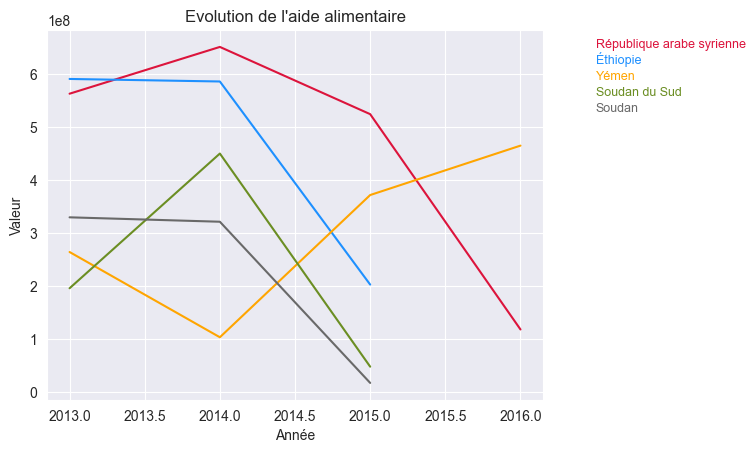

In [784]:
sns.lineplot(x = df_republique_arabe_syrienne['Année'], y = df_republique_arabe_syrienne['Valeur'], color='crimson').text(s='République arabe syrienne', x=2016.5, y=650000000.0, color='crimson', fontsize=9)
sns.lineplot(x = df_ethiopie['Année'], y = df_ethiopie['Valeur'], color='dodgerblue').text(s='Éthiopie', x=2016.5, y=620000000.0, color='dodgerblue', fontsize=9)
sns.lineplot(x = df_yemen['Année'], y = df_yemen['Valeur'], color='orange').text(s='Yémen', x=2016.5, y=590000000.0, color='orange', fontsize=9)
sns.lineplot(x = df_soudan_du_sud['Année'], y = df_soudan_du_sud['Valeur'], color = 'olivedrab').text(s='Soudan du Sud', x=2016.5, y=560000000.0, color='olivedrab', fontsize=9)
sns.lineplot(x = df_soudan['Année'], y = df_soudan['Valeur'], color = 'dimgrey').text(s='Soudan', x=2016.5, y=530000000.0, color='dimgrey', fontsize=9)
plt.title("Evolution de l'aide alimentaire", loc='center')



In [ ]:
evolution_pays.head()

In [ ]:
evolution_pays = evolution_pays.reset_index()

In [ ]:
evolution_pays.head()

Année,Zone,2013,2014,2015,2016
0,Afghanistan,128238000.0,57214000.0,NaN,NaN
1,Algérie,35234000.0,18980000.0,17424000.0,9476000.0
2,Angola,5000000.0,14000.0,NaN,NaN
3,Bangladesh,131018000.0,194628000.0,22542000.0,NaN
4,Bhoutan,1724000.0,146000.0,578000.0,218000.0


In [ ]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
list_pays = top_10_aide.index.values.tolist()
list_pays_slice = list_pays[0:5]
print(list_pays_slice)

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


In [ ]:
#On filtre sur le dataframe avec notre liste
evolution_5_pays = evolution_pays[evolution_pays['Zone'].isin(list_pays_slice)]

In [ ]:
# Affichage des pays avec l'aide alimentaire par année
evolution_5_pays.head()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [ ]:
dispo_agg_pop.columns


Index(['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité intérieure', 'Année', 'Population', 'Kcal_dispo_pays'],
      dtype='object')

In [ ]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_par_habitant = dispo_agg_pop.drop(columns=["Disponibilité intérieure", "Année", "Population"]) 

In [1109]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispo_par_habitant = dispo_par_habitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
dispo_par_habitant.head(10)
moins_dispo = dispo_par_habitant.head(10).reset_index()


In [1110]:
moins_dispo.head(10)

,index,Zone,Disponibilité alimentaire (Kcal/personne/jour),Kcal_dispo_pays
0,128,République centrafricaine,1879.0,8.635927e+09
1,166,Zambie,1924.0,3.242632e+10
2,91,Madagascar,2056.0,5.257297e+10
3,0,Afghanistan,2087.0,7.574999e+10
4,65,Haïti,2089.0,2.294216e+10
5,133,République populaire démocratique de Corée,2093.0,5.322462e+10
6,151,Tchad,2109.0,3.167033e+10
7,167,Zimbabwe,2113.0,3.008193e+10
8,114,Ouganda,2126.0,8.752017e+10
9,172,Éthiopie,2129.0,2.265254e+11


In [1113]:
moins_dispo.iloc[5,1] = "RPD de Corée"

/var/folders/r_/fd0gwkxn6n995_hk_5lc9f540000gn/T/ipykernel_95323/2604262571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph3= sns.barplot(x=moins_dispo['Zone'] ,y=moins_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], palette="Reds_r")


Text(0.5, 1.0, '10 pays à faible disponibilité alimentaire')

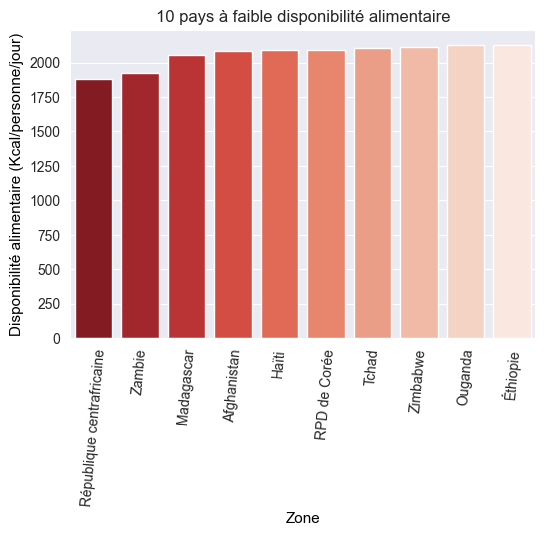

In [1114]:
plt.figure(figsize=(6,4))
graph3= sns.barplot(x=moins_dispo['Zone'] ,y=moins_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], palette="Reds_r")
plt.xlabel('Zone', fontsize=11, color='black')
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)", fontsize=11, color='black')
plt.xticks(rotation = 85)
plt.title("10 pays à faible disponibilité alimentaire", loc='center')




<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [811]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_par_habitant = dispo_par_habitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
dispo_par_habitant.head(10)
plus_dispo = dispo_par_habitant.head(10)

/var/folders/r_/fd0gwkxn6n995_hk_5lc9f540000gn/T/ipykernel_95323/3969104232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plus_dispo['Zone'] ,y=plus_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], palette="Blues_r")


Text(0.5, 1.0, '10 pays à forte disponibilité alimentaire')

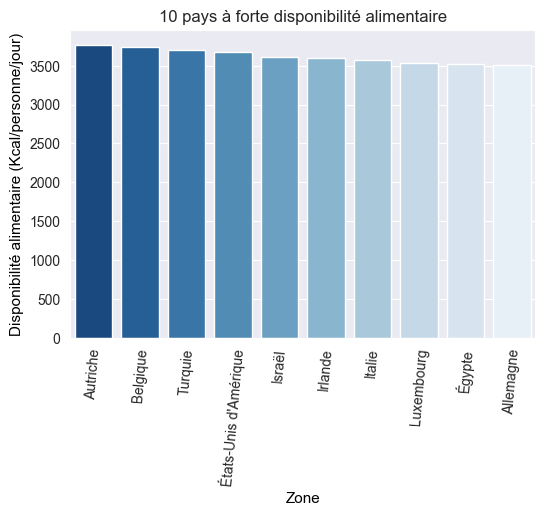

In [816]:
plt.figure(figsize=(6,4))
sns.barplot(x=plus_dispo['Zone'] ,y=plus_dispo['Disponibilité alimentaire (Kcal/personne/jour)'], palette="Blues_r")
plt.xlabel('Zone', fontsize=11, color='black')
plt.ylabel("Disponibilité alimentaire (Kcal/personne/jour)", fontsize=11, color='black')
plt.xticks(rotation = 85)
plt.title("10 pays à forte disponibilité alimentaire", loc='center')



<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [ ]:
#création d'un dataframe avec uniquement la Thaïlande 
pays_documentes.loc[pays_documentes["Zone"] == "Thaïlande"]

,Zone,sous_nutrition,Annee,Population,pourcentage_sous_nutrition
185,Thaïlande,6200000.0,2017,69209810.0,8.96


In [ ]:
#Calcul de la sous nutrition en Thaïlande : 8,96%


In [ ]:
# On calcule la proportion exportée en fonction de la proportion
thailande_manioc = dispo_alimentaire_csv.loc[(dispo_alimentaire_csv['Zone'] == "Thaïlande") & (dispo_alimentaire_csv['Produit'] == "Manioc")]

In [944]:
thailande_manioc.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [ ]:
export_manioc = round(((thailande_manioc['Exportations - Quantité']/thailande_manioc['Production'])*100),2)
print(export_manioc) 


13809    83.41
dtype: float64


In [ ]:
nourriture_manioc = round(((thailande_manioc['Nourriture']/thailande_manioc['Production'])*100),2)
print(nourriture_manioc)

13809    2.88
dtype: float64


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>